# Titanic - Machine Learning classic

## Overview
The complete overview and description of the Kaggle competition be found [here](https://www.kaggle.com/competitions/titanic).

The goal of the competition is to create a model that predicts which passengers survived the Titanic shipwreck.

In [1]:
# data analysis
import pandas as pd
import numpy as np

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Acquire Training and Testing Data

The information regarding the features are explicitly presented [here](https://www.kaggle.com/competitions/titanic/data) in detail.

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
test_df_copy = test_df.copy()
df = [train_df, test_df]

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Exploratory Data Analysis
This stage will focus on comprehending the nature and relationships of the features.

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
len(test_df)/(len(train_df)+len(test_df))

0.31932773109243695

In [8]:
train_df['Survived'] = train_df['Survived'].astype(int)
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Observations

**Distribution**
- The train-test is split around 70/30, with testing set representing 32.2% of the combined sets.
- The probability of survival in context of the training set is at 38.38%.

**Data Types**
- Numerical: *Age, Fare, Parch, SibSp*
- Categorical: *Survived, Sex, Embarked, Pclass*
- Mixed/Alphanumeric: *PassengerId, Ticket, Cabin*

# Analyzing the Numerical Features
For the numerical variables, the seaborn **pairplot** will be helpful in presenting the pariwise relationships across each numerical variables. The diagonal plots are the main focus here as they are treated as distribution plots of the features. The rest is just being extra and for eye candy.

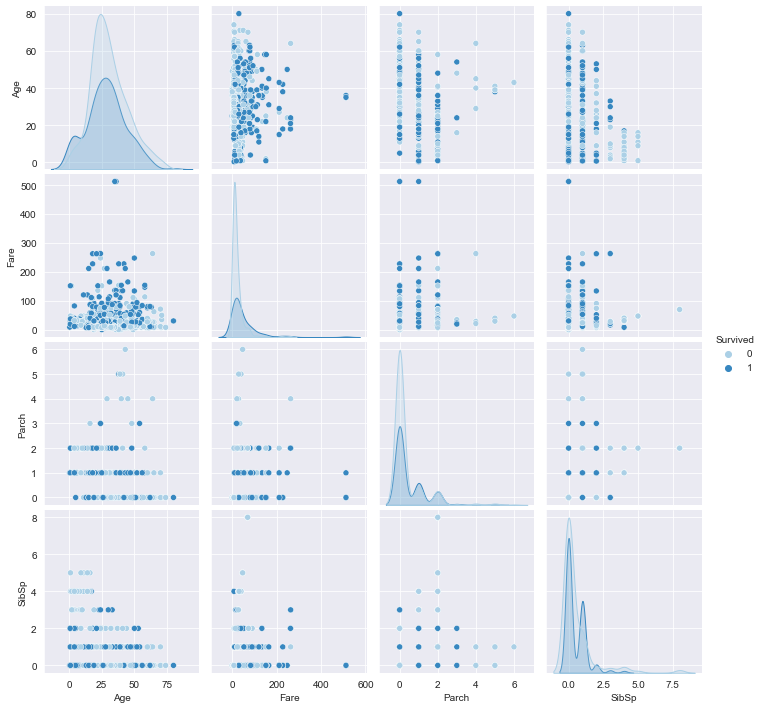

In [9]:
# Separate the training set into groups of numerical and categorical variables.
# The 'Survived' was only included in the numerical category so we can use it to classify the features when we create the pairplot
df_num = train_df[['Survived','Age', 'Fare', 'Parch', 'SibSp']]

# Classify by 'Survived'
sns.set_style('darkgrid')
sns.pairplot(df_num, hue='Survived', palette='Blues')

<AxesSubplot:xlabel='Age', ylabel='Count'>

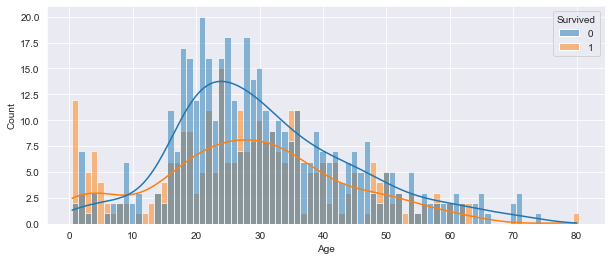

In [10]:
plt.figure(figsize=(10,4))

sns.histplot(data=train_df, x='Age', hue='Survived', binwidth=1, kde=True)

<AxesSubplot:xlabel='SibSp', ylabel='Count'>

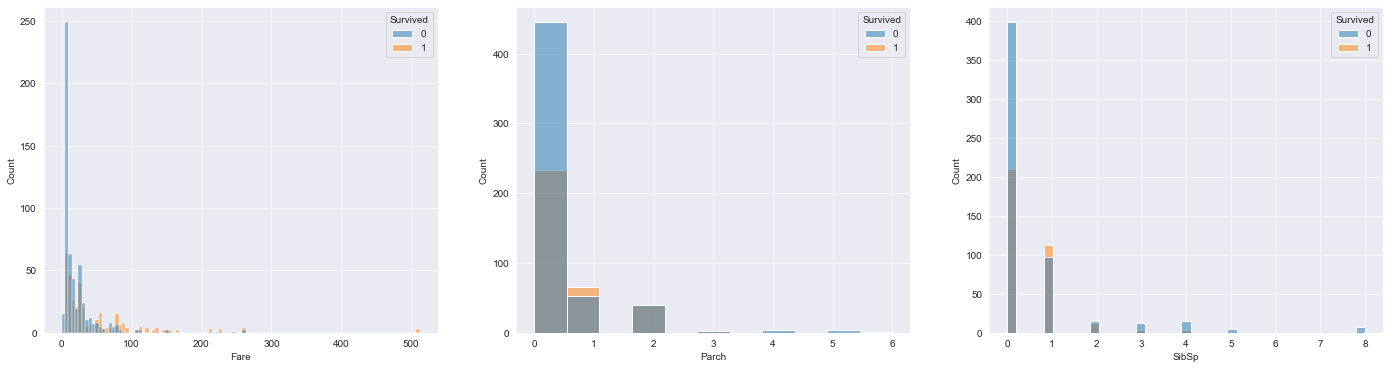

In [11]:
plt.figure(figsize=(24,6))
plt.subplot(1,3,1)
sns.histplot(data=train_df, x="Fare", hue="Survived")

plt.subplot(1,3,2)
sns.histplot(data=train_df, x="Parch", hue="Survived")

plt.subplot(1,3,3)
sns.histplot(data=train_df, x="SibSp", hue="Survived")

**Age**
- More normally distributed compared to the rest.
- Majority of passengers fall in the 15-35 age bracket.
- Toddlers (<10 y.o.) were more likely to survive.

**Fare**
- Most people had cheap tickets.
- Data skewed to the right.

**Parch**
- Most people didn't have any parents nor chilren on board.
- Singles more likely to die.
- Data skewed to the right.

**SibSp**
- Most people didn't have any siblings on board.
- Data skewed to the right.

# Correlating the Numerical Variables

<AxesSubplot:>

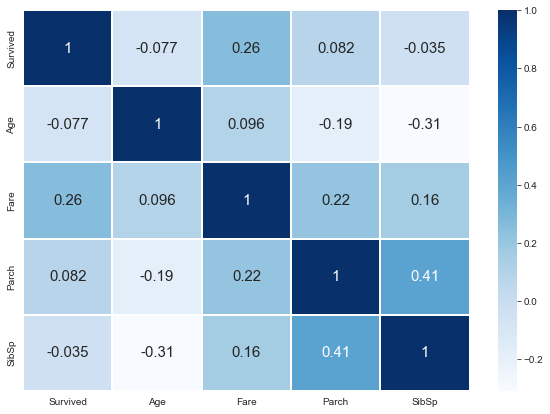

In [12]:
## Correlation Matrix
plt.subplots(figsize=(10,7))
sns.heatmap(df_num.corr(), cmap='Blues', annot=True, linewidths=2, annot_kws={"fontsize":15})

#### Observations

- Age has a very weak correlation with our solution goal despite following a normal distribution.
- Fare has a relatively strong correlation with our solution goal.

#### Decisions
- We can try normalizing the skewed distributions to see if it improves the correlations.
- Create categorical features 'AgeGroup' from existing 'Age'.
- Create categorical feature 'Familty' from existing 'Parch' and 'SibSp'

In [13]:
# Creating Family feature

In [14]:
for dataset in df:
    dataset['Family'] = dataset['Parch'] + dataset['SibSp']

<AxesSubplot:xlabel='Family', ylabel='Count'>

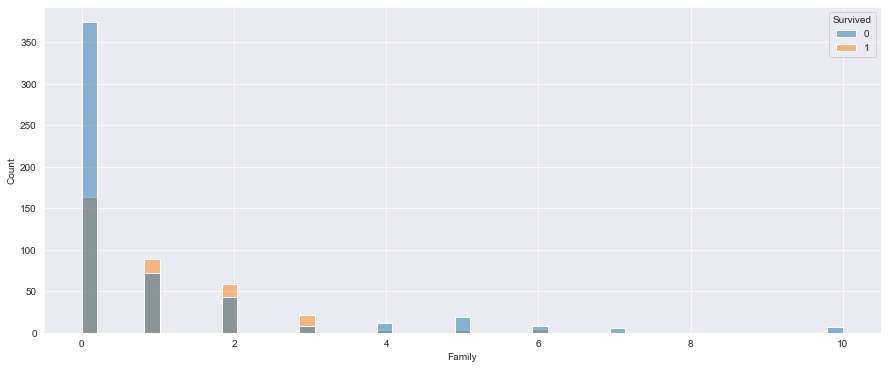

In [15]:
plt.figure(figsize=(15,6))
sns.histplot(data=train_df, x="Family", hue="Survived")

# Normalizing Numerical Features
The **probability plot** or **quantile-quntile plot (QQplot)** allows us to plot our sample data against the quantiles of a normal distribution. This will serve as reference to see how our subsequent data transformations react to the curve, and enable us to select the best form of transformation which resulted to the best fit.

We can try use the following data transformation techniques:
- Square Root
- Cube Root
- Logarithmic. **Log(x+1)** wil ensure the log transformation won't result in undefined values because our data contains 'zero' values, and log(0) returns undefined.

In [16]:
import scipy.stats as stats

# Defining the function to generate the distribution plot alongside QQplot
def QQplot(df, col):
    plt.figure(figsize = (10, 4))
    plt.subplot(1,2,1)
    sns.histplot(x=df[col].dropna(), kde=True)
    
    plt.subplot(1,2,2)
    stats.probplot(df[col].dropna(), dist="norm", plot=plt)

In [17]:
# Perform data transformations and generate QQplots for all our values
def perform_transformations(dataset, feature):
    dataset['{}_sqrt'.format(feature)] = dataset[feature]**(1./2)
    QQplot(dataset, '{}_sqrt'.format(feature))
    
    dataset['{}_cbrt'.format(feature)] = dataset[feature]**(1./3)
    QQplot(dataset, '{}_cbrt'.format(feature))

    dataset['{}_log(x+1)'.format(feature)] = np.log(dataset[feature] + 1)
    QQplot(dataset, '{}_log(x+1)'.format(feature))

#### Normalizing Age

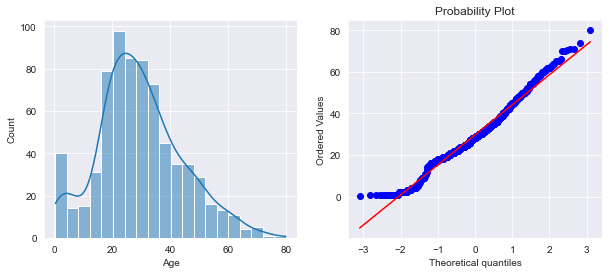

In [18]:
QQplot(train_df, 'Age')

#### Normalizing Fare

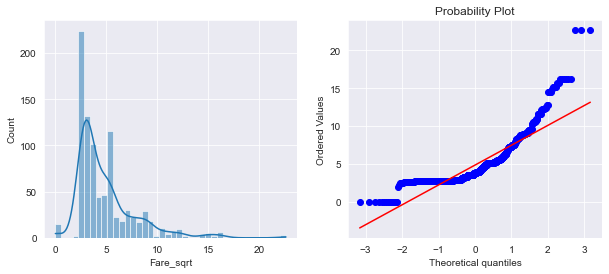

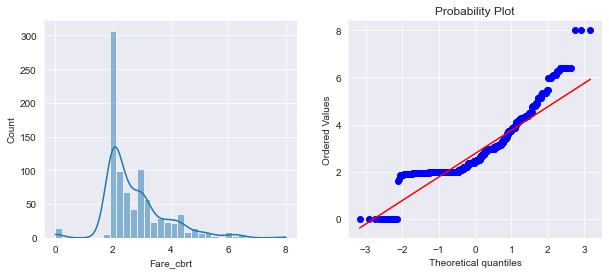

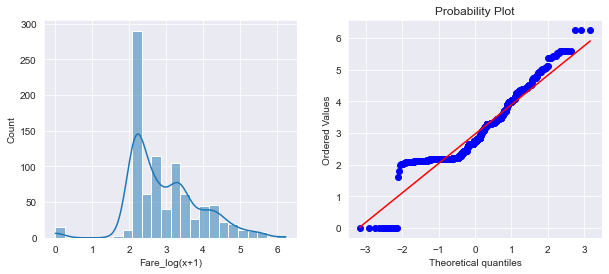

In [19]:
perform_transformations(train_df, 'Fare')

In [20]:
#### Normalizing Family

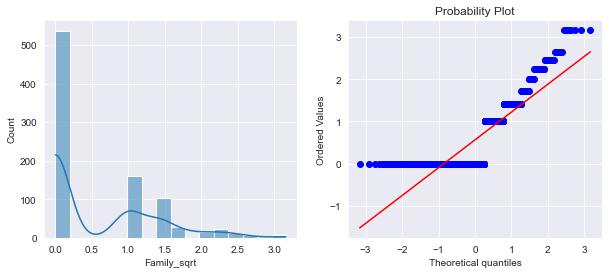

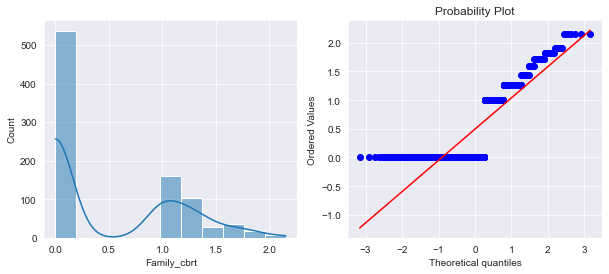

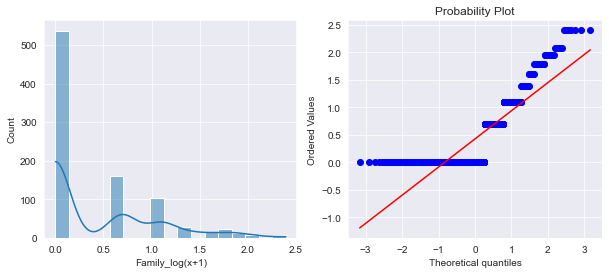

In [21]:
perform_transformations(train_df, 'Family')

#### Observations

- **Age.** Normally distributed. No need to transform.
- **Fare** Still highly skewed. Logarithmic transformation shows better result.
- **Family** Still highly skewed. Bicubic transformation shows better result.


#### Decisions
- Perform logarithmic transformation on 'Fare' feature.
- Perform bicubic transformation on 'Family' feature

## Performing transformation to Features

In [22]:
for dataset in df:
    dataset['Age'].fillna(dataset['Age'].mean(), inplace = True) #mean as it is normally distributed
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True) #median as it is not normally distributed
    dataset['Family'].fillna(dataset['Family'].median(), inplace = True) #median as it is not normally distributed
    dataset['Fare_log(x+1)'] = np.log(dataset['Fare'] + 1)
    dataset['Family_cbrt'] = dataset['Family']**(1./3)

In [23]:
tr_corr = train_df[['Survived', 'Age', 'Fare_log(x+1)', 'Family_cbrt']]

<AxesSubplot:>

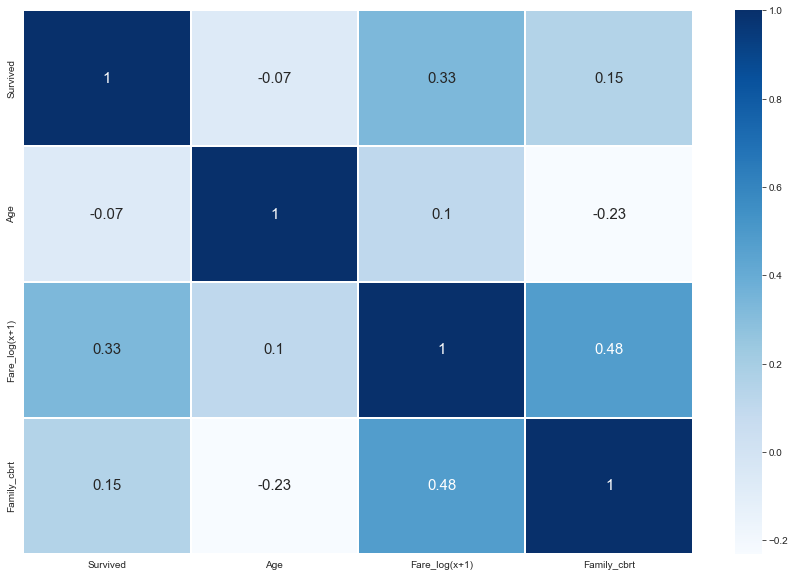

In [24]:
## Correlation Matrix for 'Fare' Transformations
plt.subplots(figsize=(15,10))
sns.heatmap(tr_corr.corr(), cmap='Blues', annot=True, linewidths=2, annot_kws={"fontsize":15})

#### Observations

- After transforming the 'Fare', its correlation with solution goal improved.
- After transforming the 'Family', its correlation with solution goal improved.


## Creating 'AgeGroup' Feature from 'Age'

In [25]:
# Converting 'AgeGroup' into a Categorical Variable
for dataset in df:
    dataset.loc[dataset['Age'] <= 10, 'AgeGroupNum'] = 'Age_0-10'
    dataset.loc[(dataset['Age'] > 10) & (dataset['Age'] <= 20), 'AgeGroupNum'] = 'Age_10-20'
    dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <= 30), 'AgeGroupNum'] = 'Age_20-30'
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 40), 'AgeGroupNum'] = 'Age_30-40'
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 50), 'AgeGroupNum'] = 'Age_40-50'
    dataset.loc[(dataset['Age'] > 50) & (dataset['Age'] <= 60), 'AgeGroupNum'] = 'Age_50-60'
    dataset.loc[(dataset['Age'] > 60) & (dataset['Age'] <= 70), 'AgeGroupNum'] = 'Age_60-70'
    dataset.loc[(dataset['Age'] > 70), 'AgeGroupNum'] = 'Age_71+'

train_df['AgeGroupNum'].unique()

array(['Age_20-30', 'Age_30-40', 'Age_50-60', 'Age_0-10', 'Age_10-20',
       'Age_60-70', 'Age_40-50', 'Age_71+'], dtype=object)

<AxesSubplot:xlabel='AgeGroupNum', ylabel='count'>

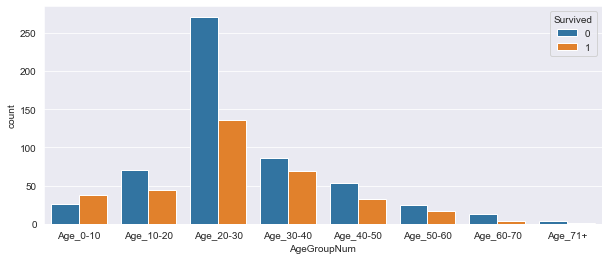

In [26]:
plt.figure(figsize=(10,4))
sns.countplot(data=train_df, x='AgeGroupNum', hue='Survived', order=['Age_0-10','Age_10-20','Age_20-30','Age_30-40','Age_40-50','Age_50-60','Age_60-70','Age_71+'])

# Analyzing the Categorical Features

The categorical variables, along with the features we created previously, that we want to analyze are as follows:
- Pclass
- Sex
- AgeGroupNum
- Embarked

Let's use **countplots** to visualize the distribution of each classification with respect to survival, and **lineplots** to determine the corresponding survival rates (in % form). 

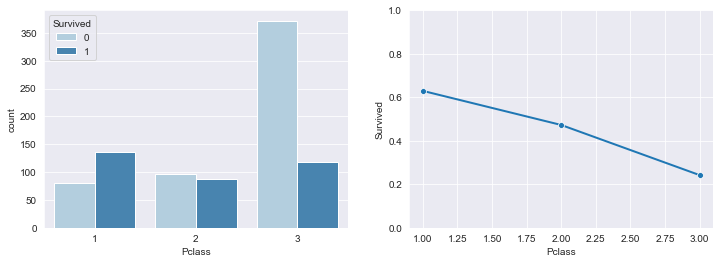

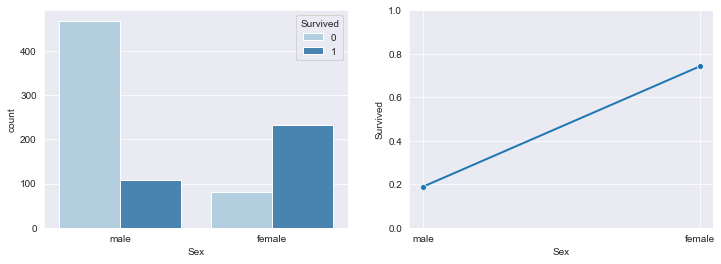

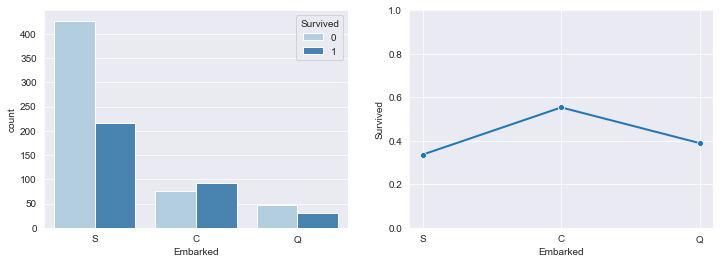

In [27]:
def Catplot(df, x, y):
    with sns.axes_style('darkgrid'):
        plt.figure(figsize = (12, 4))
        plt.subplot(1,2,1)
        sns.countplot( x=df[x].dropna(), hue=df[y], palette='Blues')
        
        plt.subplot(1,2,2)
        plt.ylim(0,1)
        sns.lineplot( x=df[x], y=df[y], data=df, ci=None, linewidth=2, marker="o")
        
Catplot(train_df, 'Pclass', 'Survived')
Catplot(train_df, 'Sex', 'Survived')
Catplot(train_df, 'Embarked', 'Survived')



### Observations

**Pclass**
- Most passengers traveled in 3rd class. Higher cabin class produces higher chances for survival.
- Passengers from the 1st class had about 2 times higher survival rate.

**Sex**
- Most passengers were men. 
- Women tend to survive more. 

**Embarked**
- Most passengers embarked in Southampton.
- Highest survival rate had passengers from Cherbourg.


### Decisions
- Validate the correlations of the categorical features with solution goal.
- Delete values from T deck

# Analyzing the Alphanumeric Variables

### Analyzing 'Name'

Prefixes Meaning

- **Rev.** Ministers of most Christian denominations; ordained clergymen since 17th century.
- **Mlle and Miss.** Unmarried female; young lady.
- **Mme.** Woman
- **Master, Major, and Don.** Lord, master, or owner (of a household).
- **Col.** Colonel; army officer of high rank.
- **the Countess.** Wife or widow of a count.
- **Capt.** Probably the captain of the ship.
- **Ms.** Any women regardless of marital status.
- **Lady.** Princesses or daughters of royal blood.
- **Jonkheer.** Female equivalent denoting the lowest rank within the nobility.

Split the full name into a list by comma, then return the title by indexing the 2nd position

Split the name into a list by period, then return the title by indexing the 1st position

In [28]:
for dataset in df:
    dataset['Title'] = dataset['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Col', 'Don', 'Dona', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Rev', 'Sir','the Countess'], 'Others')

# Correlating the Categorical Features
Assessing the strength of association (correlation) across variables is one way to conduct feature selection. This time, it wouldn't be ideal to use **Pearson's correlation matrix** we did for our numerical variables earlier because we are now dealing with categorical variables (both the predictors and response variables). Using the **[Chi-square test](https://towardsdatascience.com/chi-square-test-for-feature-selection-in-machine-learning-206b1f0b8223#:~:text=In%20feature%20selection%2C%20we%20aim,hypothesis%20of%20independence%20is%20incorrect.)** is the appropriate statistical method here.

Before we can conduct Chi-square tests, we must ensure that our categorical data are numerically encoded first using `LabelEncoder()`.

In [29]:
from sklearn.preprocessing import LabelEncoder
label_encode = LabelEncoder()

train_df_copy = train_df.copy()

train_df_copy['Pclass'] = label_encode.fit_transform(train_df_copy['Pclass'])
train_df_copy['Sex'] = label_encode.fit_transform(train_df_copy['Sex'])
train_df_copy['AgeGroupNum'] = label_encode.fit_transform(train_df_copy['AgeGroupNum'])
train_df_copy['Embarked'] = label_encode.fit_transform(train_df_copy['Embarked'])
train_df_copy['Title'] = label_encode.fit_transform(train_df_copy['Title'])

train_df_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Family,Fare_sqrt,Fare_cbrt,Fare_log(x+1),Family_sqrt,Family_cbrt,Family_log(x+1),AgeGroupNum,Title
0,1,0,2,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,...,2,1,2.692582,1.935438,2.110213,1.0,1.0,0.693147,2,2
1,2,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,...,0,1,8.442944,4.146318,4.280593,1.0,1.0,0.693147,3,3
2,3,1,2,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,...,2,0,2.815138,1.993730,2.188856,0.0,0.0,0.000000,2,1
3,4,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,...,2,1,7.286975,3.758647,3.990834,1.0,1.0,0.693147,3,3
4,5,0,2,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,...,2,0,2.837252,2.004158,2.202765,0.0,0.0,0.000000,3,2


In [30]:
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split

# Split our dataset into x and y variables
x = train_df_copy[['Pclass', 'Sex', 'AgeGroupNum', 'Embarked', 'Title']]
y = train_df_copy['Survived']
chi2_scores = chi2(x,y)

chi2_scores = pd.DataFrame(np.transpose(chi2_scores), index=['Pclass', 'Sex', 'AgeGroupNum', 'Embarked', 'Title'], columns=['Chi2', 'p_value']).sort_values('p_value', ascending=True)
chi2_scores

,Chi2,p_value
Sex,92.702447,6.077838e-22
Pclass,54.465866,1.581715e-13
Embarked,9.755456,1.787913e-03
AgeGroupNum,1.741309,1.869730e-01
Title,1.478591,2.239950e-01


### Observations

P-value for each categorical feature is less 0.05. Thus, all categorical features are significant. 

# Data Preprocessing
- Dropping irrelevant column features.
- Perform one-hot encoding on our categorical data.


In [31]:
# Dropping irrelevant column features
train_df = train_df[['Survived', 'Pclass', 'Sex', 'Embarked', 'Fare_log(x+1)',
                   'Family_cbrt', 'AgeGroupNum', 'Title']]
test_df = test_df[['Pclass', 'Sex', 'Embarked', 'Fare_log(x+1)',
                   'Family_cbrt', 'AgeGroupNum', 'Title']]

df = [train_df, test_df]

In [32]:
train_df.isnull().sum()

Survived         0
Pclass           0
Sex              0
Embarked         2
Fare_log(x+1)    0
Family_cbrt      0
AgeGroupNum      0
Title            0
dtype: int64

In [33]:
y=train_df['Survived'].copy().astype(int)
X=train_df.drop('Survived', axis=1).copy()
data=pd.concat([X, test_df], axis=0).reset_index(drop=True)
na_cols=data.columns[data.isna().any()].tolist()
mv=pd.DataFrame(data[na_cols].isna().sum(), columns=['Number_missing'])
mv['Percentage_missing']=np.round(100*mv['Number_missing']/len(data),2)
mv

,Number_missing,Percentage_missing
Embarked,2,0.15


<AxesSubplot:>

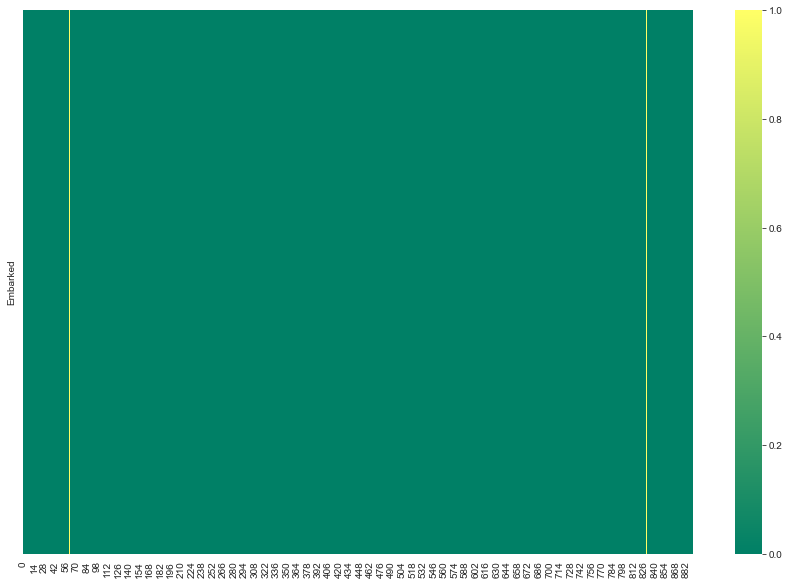

In [34]:
# Heatmap of missing values
plt.figure(figsize=(15,10))
sns.heatmap(train_df[na_cols].isna().T, cmap='summer')

In [35]:
#Replace all null values to mode
for dataset in df:
    dataset['Embarked'].fillna(dataset['Embarked'].mode(), inplace=True)

df = [train_df, test_df]

print(train_df.shape, test_df.shape)

(891, 8) (418, 7)


In [36]:
# Creating dummy indicator columns for categorical variables
train_df = pd.get_dummies(train_df, columns=['Pclass', 'Sex', 'Embarked', 'AgeGroupNum', 'Title'])
test_df = pd.get_dummies(test_df, columns=['Pclass', 'Sex', 'Embarked', 'AgeGroupNum', 'Title'])

train_df.head()

,Survived,Fare_log(x+1),Family_cbrt,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,AgeGroupNum_Age_30-40,AgeGroupNum_Age_40-50,AgeGroupNum_Age_50-60,AgeGroupNum_Age_60-70,AgeGroupNum_Age_71+,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others
0,0,2.110213,1.0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,4.280593,1.0,1,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,1,0
2,1,2.188856,0.0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,3.990834,1.0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,2.202765,0.0,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0


# Splitting Training Data
There is a need to split our training data into 2 subsets of training and testing data once more. Why is that? Note that the test.csv file provided is merely just a validation data for our competition submission, so it can't be treated as testing data which our current training data can learn from lest it would lead to overfitting our data.

In [37]:
from sklearn import model_selection
x1 = train_df.drop(['Survived'], axis=1)
y1 = train_df['Survived']
x1_train, x1_test, y1_train, y1_test = model_selection.train_test_split(x1, y1, random_state=42)

print(x1_train.shape, x1_test.shape, y1_train.shape, y1_test.shape)

(668, 23) (223, 23) (668,) (223,)


#Model Generation
Now that we have completed the data preparation, we can now begin training our model and predict our solution goal. Since we are working with a given dataset with a predetermined solution goal, we are running a form of machine learning algorithm known as supervised learning. 

Models used here:
- Logistic Regression
- Support Vector Machines
- K-Means Vector Machines
- Decision Tree
- Random Forest
- Majority Voting
- Gradient Boosting
- LGBMClassifier
- Catboost Classifier


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Defining the model algorithms for easier access
lr = LogisticRegression(max_iter = 2000)
svm = SVC()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
ens_hv = VotingClassifier(estimators =[('Support Vector Machines', svm),
                                      ('K-Means Nearest Neighbors', knn),
                                      ('Logistic Regression', lr)],
                         voting = 'hard')
ens_gb = GradientBoostingClassifier()
lgbm = LGBMClassifier(random_state=0)
catboost = CatBoostClassifier(random_state=0, verbose=False)

MLA = [
    lr,
    svm,
    knn,
    dt,
    rf,
    ens_hv,
    ens_gb,
    lgbm,
    catboost
]

row_index = 0

# Setting up the table to compare the performances of each model
MLA_cols = ['Model', 'Train Accuracy Mean', 'Test Accuracy Mean', 'Fit Time']
MLA_compare = pd.DataFrame(columns = MLA_cols)

for model in MLA:
    MLA_compare.loc[row_index, 'Model'] = model.__class__.__name__
    cv_results = model_selection.cross_validate(model, x1_train, y1_train, cv=10, return_train_score=True)
    MLA_compare.loc[row_index, 'Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'Test Accuracy Mean'] = cv_results['test_score'].mean()
    MLA_compare.loc[row_index, 'Fit Time'] = cv_results['fit_time'].mean()
    
    row_index+=1

MLA_compare.sort_values(by=['Test Accuracy Mean'], ascending=False, inplace=True)
MLA_compare

,Model,Train Accuracy Mean,Test Accuracy Mean,Fit Time
1,SVC,0.838657,0.823406,0.010861
6,GradientBoostingClassifier,0.911178,0.821913,0.087865
7,LGBMClassifier,0.928976,0.821823,0.079786
8,CatBoostClassifier,0.904525,0.820421,2.5805
5,VotingClassifier,0.84032,0.818883,0.040991
0,LogisticRegression,0.825351,0.815898,0.03049
2,KNeighborsClassifier,0.862277,0.800972,0.001694
4,RandomForestClassifier,0.953926,0.792017,0.121474
3,DecisionTreeClassifier,0.953926,0.788964,0.002599


# Prediction Submissions
We can now submit our predictions based on the models/ensemble models we tuned.

In [39]:
# Submitting predictions

X_test = test_df

lr.fit(x1_train, y1_train)
Y_pred = lr.predict(X_test)
pred = pd.DataFrame({
    "PassengerId": test_df_copy["PassengerId"],
    "Survived": Y_pred
})
pred.to_csv('submission_lr.csv', index=False)

svm.fit(x1_train, y1_train)
Y_pred = svm.predict(X_test)
pred = pd.DataFrame({
    "PassengerId": test_df_copy["PassengerId"],
    "Survived": Y_pred
})
pred.to_csv('submission_svm.csv', index=False)

dt.fit(x1_train, y1_train)
Y_pred = dt.predict(X_test)
pred = pd.DataFrame({
    "PassengerId": test_df_copy["PassengerId"],
    "Survived": Y_pred
})
pred.to_csv('submission_dt.csv', index=False)

rf.fit(x1_train, y1_train)
Y_pred = rf.predict(X_test)
pred = pd.DataFrame({
    "PassengerId": test_df_copy["PassengerId"],
    "Survived": Y_pred
})
pred.to_csv('submission_rf.csv', index=False)


knn.fit(x1_train, y1_train)
Y_pred = knn.predict(X_test)
pred = pd.DataFrame({
    "PassengerId": test_df_copy["PassengerId"],
    "Survived": Y_pred
})
pred.to_csv('submission_knn.csv', index=False)


ens_hv.fit(x1_train, y1_train)
Y_pred = ens_hv.predict(X_test)
pred = pd.DataFrame({
    "PassengerId": test_df_copy["PassengerId"],
    "Survived": Y_pred
})
pred.to_csv('submission_ensemble_hv.csv', index=False)

ens_gb.fit(x1_train, y1_train)
Y_pred = ens_gb.predict(X_test)
pred = pd.DataFrame({
    "PassengerId": test_df_copy["PassengerId"],
    "Survived": Y_pred
})
pred.to_csv('submission_ensemble_gb.csv', index=False)

lgbm.fit(x1_train, y1_train)
Y_pred = lgbm.predict(X_test)
pred = pd.DataFrame({
    "PassengerId": test_df_copy["PassengerId"],
    "Survived": Y_pred
})
pred.to_csv('submission_lgbm.csv', index=False)

catboost.fit(x1_train, y1_train)
Y_pred = catboost.predict(X_test)
pred = pd.DataFrame({
    "PassengerId": test_df_copy["PassengerId"],
    "Survived": Y_pred
})
pred.to_csv('submission_catboost.csv', index=False)